<h3>Проект: Статистический анализ данных сервиса аренды самокатов GoFast</h3>

<b>Цель проекта:</b> проанализировать данные и проверить гипотезы, которые могут помочь бизнесу вырасти.<br>
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.<br><br>
Сервисом можно пользоваться:
- <b>без подписки:</b>
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
- <b>с подпиской Ultra:</b>
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.  
  
<b>Описание исходных данных</b><br>
В исходных данных есть информация о пользователях, их поездках и подписках.<br>

<b>*Пользователи — 'users_go.csv'*:</b><br>
  - 'user_id' - уникальный идентификатор пользователя;
  - 'name' - имя пользователя;
  - 'age' - возраст;'city' - город;
  - 'subscription_type' - тип подписки (free, ultra).

<b>*Поездки — 'rides_go.csv'*:</b><br>
  - 'user_id' - уникальный идентификатор пользователя;
  - 'distance' - расстояние, которое пользователь проехал в текущей сессии (в метрах);
  - 'duration' - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
  - 'date' - дата совершения поездки.

<b>*Подписки — 'subscriptions_go.csv'*:</b><br>
  - 'subscription_type' - тип подписки;
  - 'minute_price' - стоимость одной минуты поездки по данной подписке;
  - 'start_ride_price' - стоимость начала поездки;
  - 'subscription_fee' - стоимость ежемесячного платёж.

<b>План работ:</b><br>
1. Загрузить данные о пользователях, поездках и подписках. Посмотреть данные на предмет готовности к анализу.
2. Преобразовать столбец с датой, добавить столбец с номером месяца, и проверить данные на наличие пропущенных значений и дубликатов.
3. Исследовать данные о пользователях и поездках: частота городов, соотношение пользователей с подпиской, возраст пользователей, расстояние и продолжительность поездок.
4. Объединить данные о пользователях, поездках и подписках; создайть датафреймы для пользователей без подписки и с подпиской.
5. Подсчитать выручку: агрегировать данные о поездках, найти суммарное расстояние, количество поездок, время и выручку для каждого пользователя.
6. Проверить гипотезы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom
from scipy.stats import norm

#### Шаг 1. Загрузка данных

In [ ]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subs = pd.read_csv('/datasets/subscriptions_go.csv')

In [ ]:
pd.set_option('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
           user_id          age
count  1565.000000  1565.000000
mean    762.633866    24.922045
std     443.260155     4.553496
min       1.000000    12.000000
25%     378.000000    22.000000
50%     762.000000    25.000000
75%    1146.000000    28.000000
max    1534.000000    43.000000


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


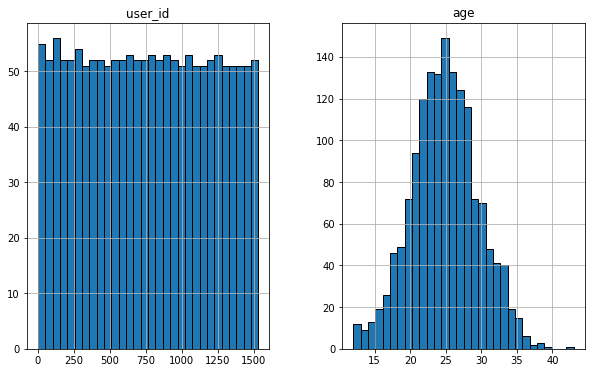

In [ ]:
print(users.info())
print(users.describe())
users.hist(figsize=(10, 6), bins=30, edgecolor='black')
users.head(10)

DF users имеет 5 столбцов и 1565 строк без пропусков. Типы столбцов в порядке, изменение не требуется. Названия столбцов соответствуют змеиному стилю.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
            user_id      distance      duration
count  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011
std      434.734317   1116.831209      6.091051
min        1.000000      0.855683      0.500000
25%      487.000000   2543.226360     13.597563
50%      889.000000   3133.609994     17.678395
75%     1213.250000   3776.222735     21.724800
max     1534.000000   7211.007745     40.823963


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


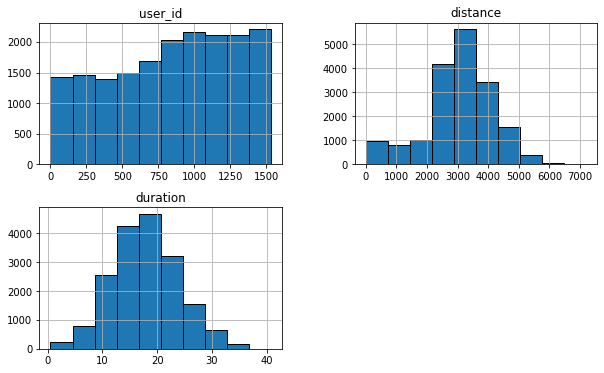

In [ ]:
print(rides.info())
print(rides.describe())
rides.hist(figsize=(10, 6), edgecolor='black')
rides.head(10)

DF rides имеет 4 столбца и 18068 строк без пропусков. Тип столбца 'date'- object следует заменить на datetime. Названия столбцов соответствуют змеиному стилю. 

In [ ]:
subs.info()
subs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


DF subs имеет 4 столбца и 2 строки без пропусков и выбросов. Типы столбцов в порядке, изменение не требуется. Названия столбцов соответствуют змеиному стилю.

#### Шаг 2. Предобработка данных

2.1 Приведение столбеца date к типу даты pandas.

In [ ]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
# изменение типа данных с object на datetime

2.2 Создание нового столбца с номером месяца на основе столбца date.

Диапозон доступных для анализа дат:
Минимальная дата: 2021-01-01 00:00:00
Максимальная дата: 2021-12-30 00:00:00


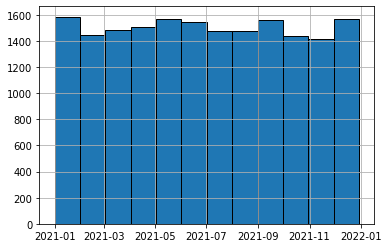

In [ ]:
print('Диапозон доступных для анализа дат:')
print('Минимальная дата:', rides['date'].min())
print('Максимальная дата:', rides['date'].max())
rides['date'].hist(bins=12, edgecolor='black');

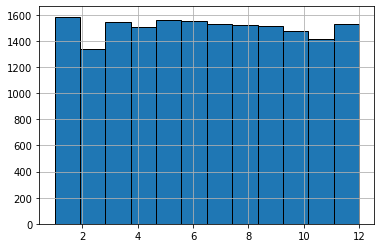

In [ ]:
rides['month'] = rides['date'].dt.month
# 'month' - cтолбец с номером месяца

rides['month'].hist(bins=12, edgecolor='black');

2.3 Обработка пропущенных значений и дубликатов.

In [ ]:
print('Количество дубликатов:', users.duplicated().sum())

Количество дубликатов: 31


In [ ]:
print('Количество пропусков:\n', users.isnull().sum())

Количество пропусков:
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


In [ ]:
users.drop_duplicates(subset='user_id', inplace=True) 
# удаление дубликатов

In [ ]:
print('Количество дубликатов после очистки:', users.duplicated(subset='user_id').sum())

Количество дубликатов после очистки: 0


In [ ]:
users['city'].unique() 
# неявных дубликатов названий городов нет

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


После предобработки количество строк в DF users уменьшилось с 1565 до 1534, удален 31 дубликат user_id, пропусков нет.

In [ ]:
#rides.duplicated().sum() - 0 дубликатов
#rides.isnull().sum() - 0 пропусков

rides.info()

print(len(rides['user_id'].unique()), 'уникальных user_id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB
1534 уникальных user_id


После предобработки количество строк в DF rides осталось неизменным - 18068. Пропусков нет. Изменен тип данных с object на datetime в столбце date. Добавлен столбец 'month' с номером месяца. Количество уникальных user_id в DF rides соответсвтует этому же значению в DF users. 

#### Шаг 3. Исследовательский анализ данных

3.1 Частота встречаемости городов.

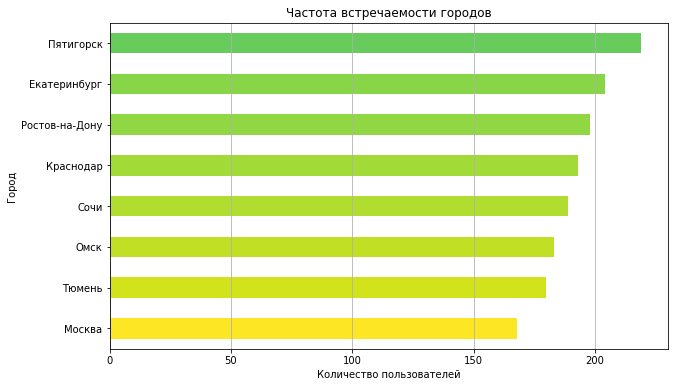

In [ ]:
# Подсчет количества пользователей в каждом городе
citys_freq = users['city'].value_counts()

colors = plt.cm.viridis(citys_freq / float(max(citys_freq)))

# Визуализация частоты встречаемости городов
plt.figure(figsize=(10, 6))
citys_freq.sort_values().plot(kind='barh', color=colors)
plt.title('Частота встречаемости городов')
plt.ylabel('Город')
plt.xlabel('Количество пользователей')
plt.grid(axis='x', linestyle='-')
plt.show()

In [ ]:
citys_freq = citys_freq.sort_values(ascending=False).reset_index()
citys_freq.columns = ['Город', 'Пользователи']
total_users = citys_freq['Пользователи'].sum()
citys_freq['Часть %'] = (citys_freq['Пользователи'] / total_users) * 100

citys_freq

,Город,Пользователи,Часть %
0,Пятигорск,219,14.276402
1,Екатеринбург,204,13.298566
2,Ростов-на-Дону,198,12.907432
3,Краснодар,193,12.581486
4,Сочи,189,12.320730
5,Омск,183,11.929596
6,Тюмень,180,11.734029
7,Москва,168,10.951760


Наибольшее количество пользователей сервиса в городе Пятигорск (219 / 14.28%), наименьшее в Москве (168 / 10.95%).

3.2 Соотношение пользователей с подпиской и без подписки.

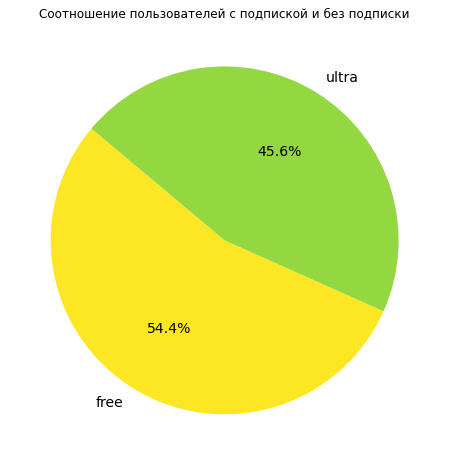

In [ ]:
# Подсчет количества пользователей с подпиской и без подписки
subs_type = users['subscription_type'].value_counts()

colors = plt.cm.viridis(subs_type / float(max(subs_type)))

# Визуализация соотношения пользователей с подпиской и без подписки
#plt.figure(figsize=(10, 4))
#subs_type.sort_values().plot(kind='barh', color=colors)
#plt.title('Соотношение пользователей с подпиской и без подписки')
#plt.ylabel('Вариант подписки')
#plt.xlabel('Количество пользователей')
#plt.grid(axis='x', linestyle='-')
#plt.show()

plt.figure(figsize=(8, 8))
plt.pie(subs_type, labels=subs_type.index, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 14})
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

In [ ]:
subs_type = subs_type.sort_values(ascending=False).reset_index()
subs_type.columns = ['Вариант подписки', 'Пользователи']
total_users = subs_type['Пользователи'].sum()
subs_type['Часть %'] = (subs_type['Пользователи'] / total_users) * 100

subs_type

,Вариант подписки,Пользователи,Часть %
0,free,835,54.432855
1,ultra,699,45.567145


Пользователей с подпиской free 835 / 54.43% от общего числа. Подпиской ultra пользуются 699 / 45.57% от общего числа пользователей.

3.3 Возраст пользователей.

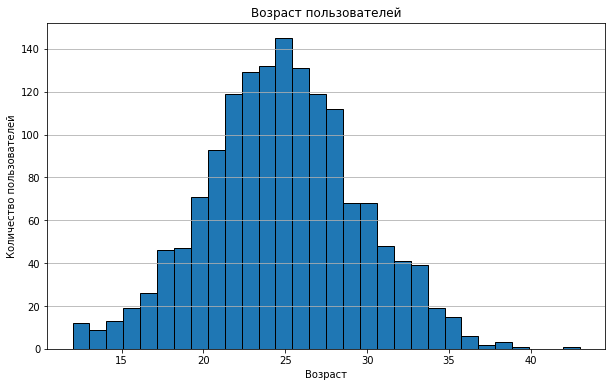

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


In [ ]:
# Подсчет количества пользователей с разным возрастом
users_age = users['age'].value_counts()

# Визуализация возраста пользователей
plt.figure(figsize=(10, 6))
users['age'].sort_values(ascending=False).plot(kind='hist', bins=30, edgecolor='black') 
plt.title('Возраст пользователей')
plt.ylabel('Количество пользователей')
plt.xlabel('Возраст')
plt.grid(axis='y', linestyle='-')
plt.show()

print(users['age'].describe())

In [ ]:
users_age = users_age.sort_values(ascending=False).reset_index()
users_age.columns = ['Возраст', 'Пользователи']
total_users = users_age['Пользователи'].sum()
users_age['Часть %'] = (users_age['Пользователи'] / total_users) * 100

users_age.head(20)

,Возраст,Пользователи,Часть %
0,25,145,9.452412
1,24,132,8.604954
2,26,131,8.539765
3,23,129,8.409387
4,27,119,7.757497
5,22,119,7.757497
6,28,112,7.301173
7,21,93,6.062581
8,20,71,4.628422
9,30,68,4.432855


In [ ]:
users_age['Часть %'].head(11).sum().round()

77.0

Согласно данным, услугами сервиса пользуются люди от 12 до 43. Средний возраст пользователя сервиса 25 лет, эта категория так же самая большая часть от общего числа пользователей - 145 / 9.45%. Больше всего пользователей в возрасте от 20 до 30 - это 77% от общего числа.

3.4 Расстояние, которое пользователь преодолел за одну поездку.

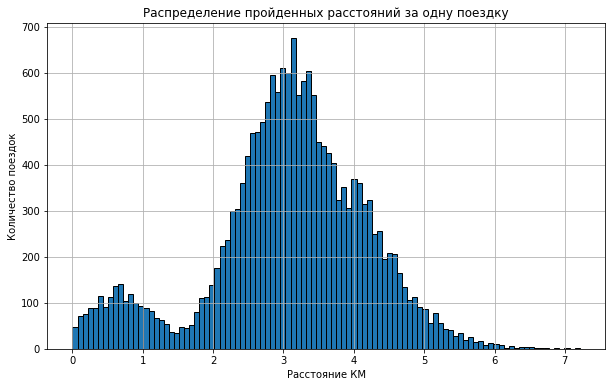

count    18068.000000
mean         3.070660
std          1.116831
min          0.000856
25%          2.543226
50%          3.133610
75%          3.776223
max          7.211008
Name: distance, dtype: float64

In [ ]:
trip = rides['distance'] / 1000

plt.figure(figsize=(10, 6))
plt.hist(trip, bins=100, edgecolor='black')
plt.title('Распределение пройденных расстояний за одну поездку')
plt.xlabel('Расстояние КМ')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

trip.describe()

Среднее расстояние преодалеваемое пользователем за одну поезду около 3-ёх километров. Присутствуют пиковые значения в районе 600-700 и 3200 метров.

3.5 Продолжительность поездок.

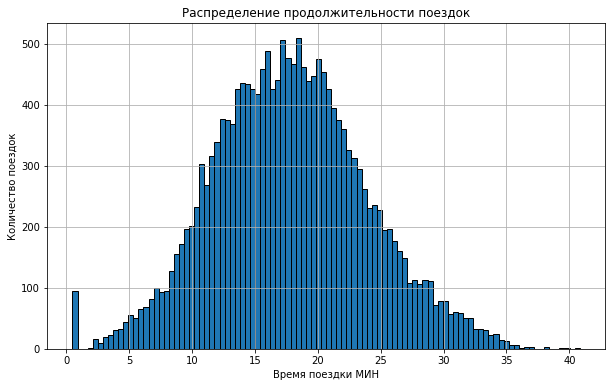

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(rides['duration'], bins=100, edgecolor='black')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Время поездки МИН')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

rides['duration'].describe()

In [ ]:
filtered_rides = rides.loc[rides['duration'] <= 1]
print(filtered_rides)

       user_id     distance  duration       date  month
6531       701  4196.445201       0.5 2021-08-31      8
6570       704  4830.824371       0.5 2021-10-14     10
6680       712  4684.004397       0.5 2021-03-04      3
6695       713  5215.642710       0.5 2021-02-25      2
6768       718  5197.436649       0.5 2021-02-11      2
...        ...          ...       ...        ...    ...
17004     1460  5531.335845       0.5 2021-01-19      1
17242     1477  6724.932981       0.5 2021-01-12      1
17314     1483  4445.481070       0.5 2021-03-06      3
17505     1496  5722.551787       0.5 2021-02-14      2
17909     1524  4103.998874       0.5 2021-06-18      6

[95 rows x 5 columns]


Средня и медианная продолжительной одной поездки - около 17 минут. Максимальное время поезди в основном не превышает 35 минут.

Подозрительный пик в районе 0-1 минута. Данные по расстоянию и дате в порядке. Возможно не записалась продолжительность поездки. Думаю данные не стоит удалять.

#### Шаг 4. Объединение данных

4.1 Объединение данных о пользователях, поездках и подписках в один датафрейм.

In [ ]:
gofast = users.merge(rides, on='user_id').merge(subs, on='subscription_type')

print(gofast.info())
gofast.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB
None


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


Количество строк в rides и gofast: 18068. DF gofast не содержит пропусков.

4.2 Создание 2 DF на основе DF gofast - c данными о пользователях без подписки, с данными о пользователях с подпиской.

In [ ]:
# DF c данными о пользователях с подпиской free
free_sub = gofast.loc[gofast['subscription_type'] == 'free']

# DF с данными о пользователях с подпиской ultra
ultra_sub = gofast.loc[gofast['subscription_type'] == 'ultra']

In [ ]:
free_sub.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


In [ ]:
ultra_sub.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


4.3 Визуализиция информации о расстоянии и времени поездок для пользователей обеих категорий.

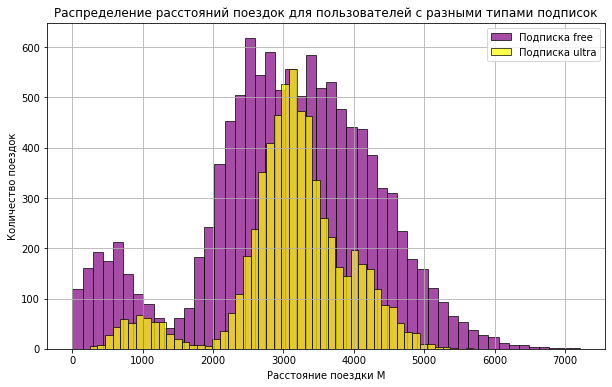

Подписка free:

 count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

 Подписка ultra:

 count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

 Разница между подписками free и ultra:

 count    5068.000000
mean      -69.950106
std       409.278476
min      -243.354755
25%      -418.881328
50%       -33.988764
75%       345.123469
max      1511.238083
Name: distance, dtype: float64


In [ ]:
# Создание гистограммы для пользователей с подпиской free
plt.figure(figsize=(10, 6))
plt.hist(free_sub['distance'], bins=50, color='purple', alpha=0.7, label='Подписка free', edgecolor='black')

# Добавление гистограммы для пользователей с подпиской ultra
plt.hist(ultra_sub['distance'], bins=50, color='yellow', alpha=0.7, label='Подписка ultra', edgecolor='black')
 
plt.title('Распределение расстояний поездок для пользователей с разными типами подписок')
plt.xlabel('Расстояние поездки М')
plt.ylabel('Количество поездок')
plt.legend()
plt.grid()
plt.show()

print('Подписка free:\n\n', free_sub['distance'].describe())
print('\n Подписка ultra:\n\n', ultra_sub['distance'].describe())
print('\n Разница между подписками free и ultra:\n\n', free_sub['distance'].describe() - ultra_sub['distance'].describe())

Пользователи с подпиской free имеют практически в 2ое большее число поездок, чем пользователи с подпиской ultra. Среднее расстояние поездки у пользователей с подпиской и без находится в районе 3050 м. (+-70 м.). Пользователи с подпиской free чаще преодалевают большее расстояние чем пользователи с подпиской ultra. Так максимальное значение поездки по подписке free равно 7211 м., а по подписке ultra 5699 м.

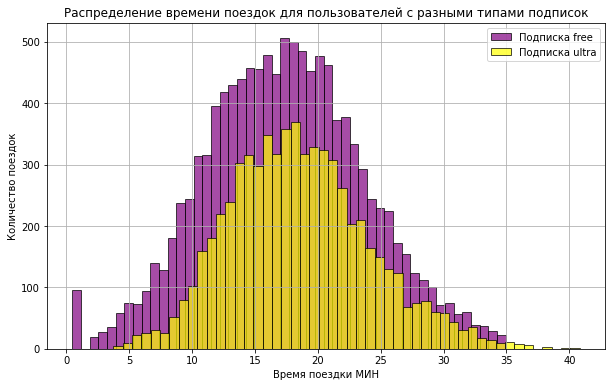

Подписка free:

 count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

 Подписка ultra:

 count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

 Разница между подписками free и ultra:

 count    5068.000000
mean       -1.151076
std         0.754755
min        -3.260353
25%        -1.566217
50%        -0.851263
75%        -0.290058
max        -5.875464
Name: duration, dtype: float64


In [ ]:
# Создание гистограммы для пользователей с подпиской free
plt.figure(figsize=(10, 6))
plt.hist(free_sub['duration'], bins=50, color='purple', alpha=0.7, label='Подписка free', edgecolor='black')

# Добавление гистограммы для пользователей с подпиской ultra
plt.hist(ultra_sub['duration'], bins=50, color='yellow', alpha=0.7, label='Подписка ultra', edgecolor='black')

plt.title('Распределение времени поездок для пользователей с разными типами подписок')
plt.xlabel('Время поездки МИН')
plt.ylabel('Количество поездок')
plt.legend()
plt.grid()
plt.show()

print('Подписка free:\n\n', free_sub['duration'].describe())
print('\n Подписка ultra:\n\n', ultra_sub['duration'].describe())
print('\n Разница между подписками free и ultra:\n\n', free_sub['duration'].describe() - ultra_sub['duration'].describe())

Среднее время поездки у пользователей с подпиской free (17.39) немного меньше, чем у пользователей с подпиской ultra (18.54), такая же ситуация и с медианным временем. Пользователи с подпиской ultra совершают более длительные поездки. Так максимальное значение времени поездки по подписке ultra составляет 41 минуту, против 35 минут по подписке free. У пользователей с подпиской free наблюдается пик в районе 0.50 минуты.

#### Шаг 5. Подсчёт выручки

5.1 Создание DF с агрегированными данными о поездках на основе DF gofast. Нужной найти: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [ ]:
# каждое значение из столбца duration округляется с np.ceil 
gofast['duration'] = np.ceil(gofast['duration']) 

per_month = gofast.groupby(['user_id', 'month']).agg({'distance': 'sum', 'duration': 'sum', 'start_ride_price': 'sum', 'minute_price': 'sum', 'subscription_fee': 'sum', 'subscription_type': 'first', 'date': 'count'}).reset_index()
per_month.columns = ['user_id', 'month', 'total_distance', 'total_duration', 'start_ride_price', 'minute_price', 'subscription_fee', 'subscription_type', 'total_trips']
per_month['start_ride_price'] = per_month['start_ride_price'] / per_month['total_trips']
per_month['minute_price'] = per_month['minute_price'] / per_month['total_trips']
per_month['subscription_fee'] = per_month['subscription_fee'] / per_month['total_trips']

print(per_month.info())
per_month.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month              11331 non-null  int64  
 2   total_distance     11331 non-null  float64
 3   total_duration     11331 non-null  float64
 4   start_ride_price   11331 non-null  float64
 5   minute_price       11331 non-null  float64
 6   subscription_fee   11331 non-null  float64
 7   subscription_type  11331 non-null  object 
 8   total_trips        11331 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 796.8+ KB
None


,user_id,month,total_distance,total_duration,start_ride_price,minute_price,subscription_fee,subscription_type,total_trips
0,1,1,7027.511294,42.0,0.0,6.0,199.0,ultra,2
1,1,4,754.159807,7.0,0.0,6.0,199.0,ultra,1
2,1,8,6723.470560,46.0,0.0,6.0,199.0,ultra,2
3,1,10,5809.911100,32.0,0.0,6.0,199.0,ultra,2
4,1,11,7003.499363,56.0,0.0,6.0,199.0,ultra,3
5,1,12,6751.629942,28.0,0.0,6.0,199.0,ultra,2
6,2,3,10187.723006,63.0,0.0,6.0,199.0,ultra,3
7,2,4,6164.381824,40.0,0.0,6.0,199.0,ultra,2
8,2,6,3255.338202,14.0,0.0,6.0,199.0,ultra,1
9,2,7,6780.722964,48.0,0.0,6.0,199.0,ultra,2


5.2 Добавление столбеца с помесячной выручкой в DF per_month. 

In [ ]:
per_month['monthly_revenue'] = (
    per_month['start_ride_price'] * per_month['total_trips']
    + per_month['minute_price'] * per_month['total_duration'] 
    + per_month['subscription_fee'])

print(per_month.info())
per_month.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month              11331 non-null  int64  
 2   total_distance     11331 non-null  float64
 3   total_duration     11331 non-null  float64
 4   start_ride_price   11331 non-null  float64
 5   minute_price       11331 non-null  float64
 6   subscription_fee   11331 non-null  float64
 7   subscription_type  11331 non-null  object 
 8   total_trips        11331 non-null  int64  
 9   monthly_revenue    11331 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 885.4+ KB
None


,user_id,month,total_distance,total_duration,start_ride_price,minute_price,subscription_fee,subscription_type,total_trips,monthly_revenue
0,1,1,7027.511294,42.0,0.0,6.0,199.0,ultra,2,451.0
1,1,4,754.159807,7.0,0.0,6.0,199.0,ultra,1,241.0
2,1,8,6723.470560,46.0,0.0,6.0,199.0,ultra,2,475.0
3,1,10,5809.911100,32.0,0.0,6.0,199.0,ultra,2,391.0
4,1,11,7003.499363,56.0,0.0,6.0,199.0,ultra,3,535.0
5,1,12,6751.629942,28.0,0.0,6.0,199.0,ultra,2,367.0
6,2,3,10187.723006,63.0,0.0,6.0,199.0,ultra,3,577.0
7,2,4,6164.381824,40.0,0.0,6.0,199.0,ultra,2,439.0
8,2,6,3255.338202,14.0,0.0,6.0,199.0,ultra,1,283.0
9,2,7,6780.722964,48.0,0.0,6.0,199.0,ultra,2,487.0


#### Шаг 6. Проверка гипотез

6.1 Тратят ли пользователи с подпиской больше времени на поездки?

<b>Гипотеза Н0</b>: Продолжительность поездок для подписчиков ultra равна продолжительности поездок для пользователей без подписки. <br>
<b>Гипотеза Н1</b>: Продолжительность поездок для подписчиков ultra больше, чем для пользователей без подписки.

In [ ]:
result = st.ttest_ind(ultra_sub['duration'], free_sub['duration'], alternative='greater')
print(result.pvalue)

if result.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [ ]:
print('Средняя продолжительность поездок для подписчиков ultra:', ultra_sub['duration'].mean().round())
print('Средняя продолжительность поездок для пользователей без подписки:', free_sub['duration'].mean().round())

Средняя продолжительность поездок для подписчиков ultra: 19.0
Средняя продолжительность поездок для пользователей без подписки: 17.0


Продолжительность поездок для подписчиков ultra больше, чем для пользователей без подписки.

6.2 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

<b>Гипотеза Н0</b>: Среднее расстояние, которое проезжают пользователи с подпиской ultra за одну поездку равно 3130 метров. <br>
<b>Гипотеза Н1</b>: Среднее расстояние, которое проезжают пользователи с подпиской ultra за одну поездку более 3130 метров.

In [ ]:
result = st.ttest_1samp(ultra_sub['distance'], 3130, alternative='greater')
print(result.pvalue)

if result.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

0.9195368847849785
Не отвергаем нулевую гипотезу


In [ ]:
print('Средняя расстояние поездок для подписчиков ultra:', ultra_sub['distance'].mean().round())

Средняя расстояние поездок для подписчиков ultra: 3115.0


Не получилось отвергнуть гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

6.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

<b>Гипотеза Н0</b>: Средняя выручка от пользователей с подпиской и пользователей без подписки равна.<br>
<b>Гипотеза Н1</b>: Средняя выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

In [ ]:
# Выбираем данные для подписки free
mr_free = per_month[per_month['subscription_type'] == 'free']['monthly_revenue']

# Выбираем данные для подписки ultra
mr_ultra = per_month[per_month['subscription_type'] == 'ultra']['monthly_revenue']

result = st.ttest_ind(mr_ultra, mr_free, alternative='greater')
print(result.pvalue)   


if result.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


In [ ]:
print('Средняя выручка от пользователей с подпиской:', per_month.groupby('subscription_type')['monthly_revenue'].mean().round())

Средняя выручка от пользователей с подпиской: subscription_type
free     329.0
ultra    363.0
Name: monthly_revenue, dtype: float64


Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

6.4 Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Парный t-тест, у нас есть два связанных набора данных, измерения до и после вмешательства на одной и той же выборке. st.ttest_rel(before, after)

#### Шаг 7. Распределения

7.1 Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%.

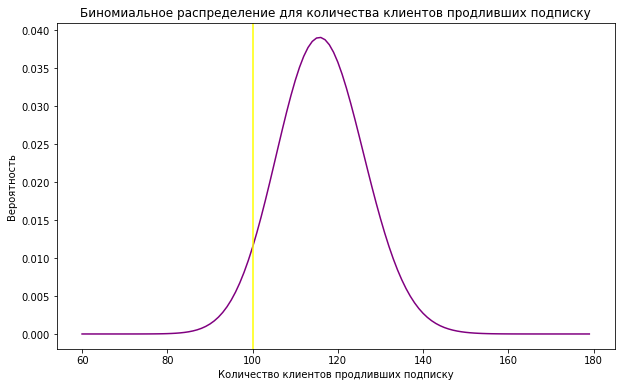

Минимальное количество промокодов, которое нужно разослать:  1161


In [ ]:
p = 0.1
n = 100

# Минимальное количество промокодов, чтобы вероятность не выполнить план была примерно 5%
while binom.cdf(100 - 1, n, p) > 0.05:
    n += 1

x = range(60,180)
plt.figure(figsize=(10, 6))
plt.plot(x, binom.pmf(x, n, p), 'b-', color='purple')
plt.xlabel('Количество клиентов продливших подписку')
plt.ylabel('Вероятность')
plt.axvline(100, color='yellow')
plt.title('Биномиальное распределение для количества клиентов продливших подписку')
plt.show()

print("Минимальное количество промокодов, которое нужно разослать: ", n)

7.2 Оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

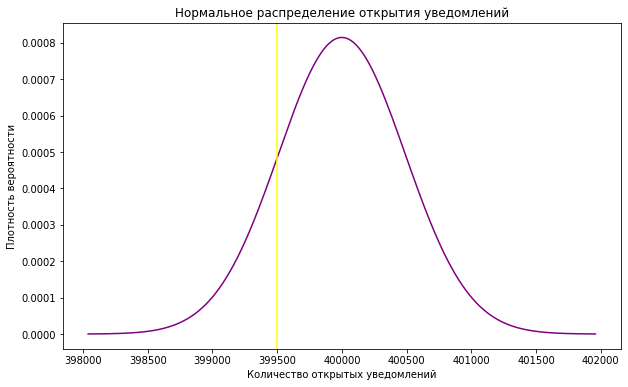

Вероятность того, что уведомление откроют не более 399.5 тыс. пользователей: 15.371708296369768


In [ ]:
p = 0.40
n = 1000000
users = 399500

# Параметры нормального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

# Вероятность открытия не более 399.5 тыс. уведомлений
result = norm.cdf(users, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(np.arange((mu - 4 * sigma), (mu + 4 * sigma), 1), norm.pdf(np.arange((mu - 4 * sigma), (mu + 4 * sigma), 1), mu, sigma), 'b-', color='purple')
plt.axvline(399500, color='yellow')
plt.title('Нормальное распределение открытия уведомлений')
plt.xlabel('Количество открытых уведомлений')
plt.ylabel('Плотность вероятности')
plt.show()

print("Вероятность того, что уведомление откроют не более 399.5 тыс. пользователей:", result * 100)

<b>Общий вывод:</b><br>


По итогам проведенного анализа данных в рамках данного проекта можно сделать следующие выводы:
1. После предварительного изучения и предобработки данных, установления корректного типа данных, удаления дубликатов и добавления необходимого столбца, данные подготовлены для дальнейшего анализа.
2. В ходе исследовательского анализа данных было выявлено:
- Наибольшее количество пользователей сервиса в городе Пятигорск 219 / 14.28%, наименьшее в Москве 168 / 10.95%.
- Пользователей с подпиской free 835 / 54.43% от общего числа. Подпиской ultra пользуются 699 / 45.57% от общего числа пользователей.
- Услугами сервиса пользуются люди от 12 до 43 лет. Средний возраст пользователя сервиса - 25 лет, эта категория так же является самой большой частью от общего числа пользователей - 145 / 9.45%. Больше всего пользователей в возрасте от 20 до 30 - это 77% от общего числа.
- Среднее расстояние преодалеваемое пользователем за одну поезду около 3-ёх километров. Присутствуют пиковые значения в районе 600-700 и 3200 метров.
- Средня и медианная продолжительной одной поездки - около 17 минут. Максимальное время поезди в основном не превышает 35 минут.
3. По результату анализа расстоянии и времени поездок для пользователей с подпиской и без выявлено:
- Пользователи с подпиской free имеют практически в 2ое большее число поездок, чем пользователи с подпиской ultra. Среднее расстояние поездки у пользователей с подпиской и без находится в районе 3050 м. (+-70 м.). Пользователи с подпиской free чаще преодалевают большее расстояние чем пользователи с подпиской ultra. Так максимальное значение поездки по подписке free равно 7211 м., а по подписке ultra 5699 м.
- Среднее время поездки у пользователей с подпиской free 17.39 мин. немного меньше, чем у пользователей с подпиской ultra 18.54 мин., такая же ситуация и с медианным временем. Пользователи с подпиской ultra совершают более длительные поездки. Так максимальное значение времени поездки по подписке ultra составляет 41 минуту, против 35 минут по подписке free. У пользователей с подпиской free наблюдается пик в районе 0.50 минуты.
4. В ходе исследования были подтверждены следующие гипотезы:
- продолжительность поездок для подписчиков ultra больше, чем для пользователей без подписки;
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров;
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
5. Задания на распределения:
- Минимальное количество промокодов которое нужно разослать, что бы 100 существующих клиентов продлили подписку, при вероятности не выполнить план 5% - 1161 штук. 
- Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей из 1000000 - 15.37%
